In [4]:
import pandas as pd
day_titles = ['day1', 'day2', 'day3' , 'day4', 'day5','day6']

df = pd.read_csv('data.csv', names=day_titles)
df.head(10)

,day1,day2,day3,day4,day5,day6
0,8:56 AM,9:00 AM,7:45 AM,7:45 AM,8:05 AM,7:45 AM
1,8:40 AM,8:40 AM,8:30 AM,8:30 AM,8:45 AM,8:20 AM
2,8:45 AM,8:20 AM,8:05 AM,8:00 AM,8:05 AM,8:00 AM
3,8:40 AM,8:40 AM,8:40 AM,8:25 AM,8:40 AM,8:40 AM
4,8:55 AM,8:50 AM,8:55 AM,8:10 AM,8:15 AM,8:05 AM
5,8:45 AM,8:45 AM,8:45 AM,8:40 AM,8:30 AM,8:40 AM
6,8:45 AM,8:54 AM,8:38 AM,8:40 AM,8:32 AM,8:41 AM
7,absent,11:00 AM,8:35 AM,8:15 AM,8:10 AM,8:10 AM
8,8:39 AM,8:13 AM,8:15 AM,8:12 AM,8:10 AM,8:00 AM
9,9:00 AM,8:50 AM,8:50 AM,8:50 AM,8:40 AM,8:45 AM


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# df.loc[df['day1'] == 'absent','day1'] = '10:00 AM'
# df.head(10)

,day1,day2,day3,day4,day5,day6
0,8:56 AM,9:00 AM,7:45 AM,7:45 AM,8:05 AM,7:45 AM
1,8:40 AM,8:40 AM,8:30 AM,8:30 AM,8:45 AM,8:20 AM
2,8:45 AM,8:20 AM,8:05 AM,8:00 AM,8:05 AM,8:00 AM
3,8:40 AM,8:40 AM,8:40 AM,8:25 AM,8:40 AM,8:40 AM
4,8:55 AM,8:50 AM,8:55 AM,8:10 AM,8:15 AM,8:05 AM
5,8:45 AM,8:45 AM,8:45 AM,8:40 AM,8:30 AM,8:40 AM
6,8:45 AM,8:54 AM,8:38 AM,8:40 AM,8:32 AM,8:41 AM
7,10:00 AM,11:00 AM,8:35 AM,8:15 AM,8:10 AM,8:10 AM
8,8:39 AM,8:13 AM,8:15 AM,8:12 AM,8:10 AM,8:00 AM
9,9:00 AM,8:50 AM,8:50 AM,8:50 AM,8:40 AM,8:45 AM


In [5]:
data = df.values.reshape(-1)
data[:10]

array(['8:56 AM', '9:00 AM', '7:45 AM', '7:45 AM', '8:05 AM', '7:45 AM',
       '8:40 AM', '8:40 AM', '8:30 AM', '8:30 AM'], dtype=object)

In [36]:
df['day1'] = df['day1'].apply(lambda x : pd.to_datetime(x).strftime('%H:%M:%S'))
df['day2'] = df['day2'].apply(lambda x : pd.to_datetime(x).strftime('%H:%M:%S'))
df['day3'] = df['day3'].apply(lambda x : pd.to_datetime(x).strftime('%H:%M:%S'))
df['day4'] = df['day4'].apply(lambda x : pd.to_datetime(x).strftime('%H:%M:%S'))
df['day5'] = df['day5'].apply(lambda x : pd.to_datetime(x).strftime('%H:%M:%S'))
df['day6'] = df['day6'].apply(lambda x : pd.to_datetime(x).strftime('%H:%M:%S'))
df.head()

,day1,day2,day3,day4,day5,day6
0,08:56:00,09:00:00,07:45:00,07:45:00,08:05:00,07:45:00
1,08:40:00,08:40:00,08:30:00,08:30:00,08:45:00,08:20:00
2,08:45:00,08:20:00,08:05:00,08:00:00,08:05:00,08:00:00
3,08:40:00,08:40:00,08:40:00,08:25:00,08:40:00,08:40:00
4,08:55:00,08:50:00,08:55:00,08:10:00,08:15:00,08:05:00


In [6]:
def convert_time_to_minutes(time_text: str) ->str:
    try:
        time_delta = pd.Timestamp(time_text) - pd.Timestamp("9:00 am")
        return int(time_delta.total_seconds()/ 60)
    except ValueError:
        return None

In [13]:
minutes_early_or_late = [convert_time_to_minutes(time_text) for time_text in data]

In [15]:
minutes_early_or_late

AttributeError: 'list' object has no attribute 'head'

In [42]:
x = list(df['day1'])
#x = {v :k for k,v in x.items()}
x

['08:56:00',
 '08:40:00',
 '08:45:00',
 '08:40:00',
 '08:55:00',
 '08:45:00',
 '08:45:00',
 '10:00:00',
 '08:39:00',
 '09:00:00',
 '08:40:00',
 '08:15:00',
 '08:45:00',
 '08:45:00',
 '08:45:00',
 '08:15:00',
 '08:45:00',
 '08:45:00',
 '08:50:00',
 '08:15:00',
 '08:45:00',
 '08:45:00',
 '08:45:00']

In [16]:
y = [value for value in minutes_early_or_late if value is not None]  # drop missing/None values

In [17]:
x_label = 'Minutes (negative is early, zero is on time, positive is late)'
y_label = 'Count'
hist_title = 'Student On-Time Performance'

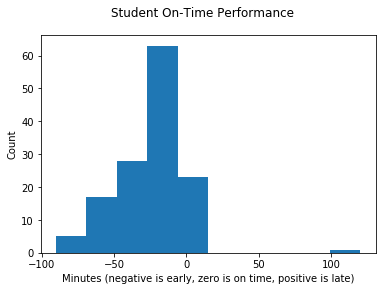

In [18]:
fig, ax = plt.subplots()
ax.hist(y)  # Use the default number of bins
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
fig.suptitle(hist_title)
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.hist(y, bins=20)  # Let's try something in between
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
fig.suptitle(hist_title)
plt.show()